# 6. mājāsdarbs

### 1. Datu ģenerēšana un aprakstošā statistika

Izveidot tabulu ar 4 kolonnām un 30 novērojumiem katrā kolonnā ar izlasēm no sekojošiem sadalījumiem:
- Normālā sadalījuma (ar vidējo vērtību 1 un dispersiju 2),
- Vienmērīgā sadalījuma,
- Puasona sadalījuma,
- Sadalījumu, kas ir vienāds ar iepriekš definētā normālā sadalījuma vērtību ar pieskaitītu normāli sadalītu gadījuma skaitli (vidējā vērtība 0 un dispersija 0.1).

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
np.random.seed(7)
# Novertējumu skaits
n = 30

# Izveidot datus ar norādītajiem sadalījumiem
norm_data = np.random.normal(1, np.sqrt(2), n)
uniform_data = np.random.uniform(size=n)
poisson_data = np.random.poisson(size=n)
combined_data = norm_data + np.random.normal(0, np.sqrt(0.1), n)

Attēlot visus datus grafiski ar histogrammu un blīvuma diagrammām.

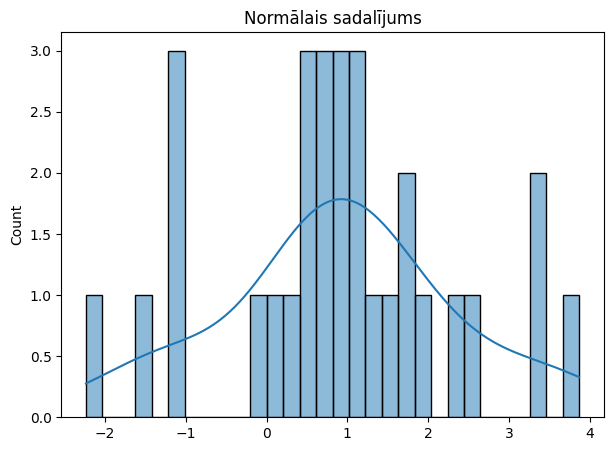

In [3]:
# Normālais sadalījums
plt.figure(figsize=(7, 5))
sns.histplot(norm_data, bins=30, kde=True)
plt.title('Normālais sadalījums')
plt.show()

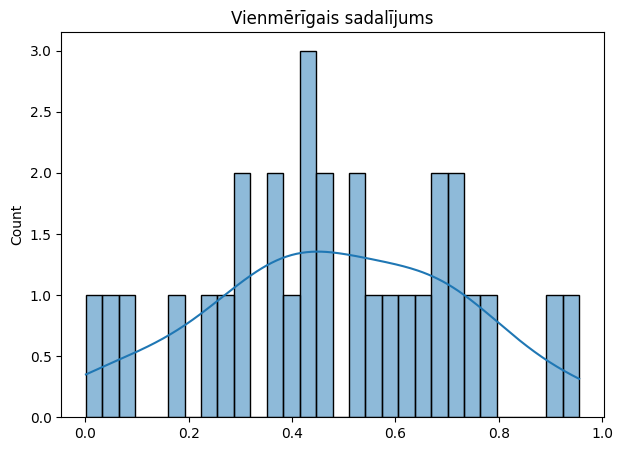

In [4]:
# Vienmērīgais sadalījums
plt.figure(figsize=(7, 5))
sns.histplot(uniform_data, bins=30, kde=True)
plt.title('Vienmērīgais sadalījums')
plt.show()

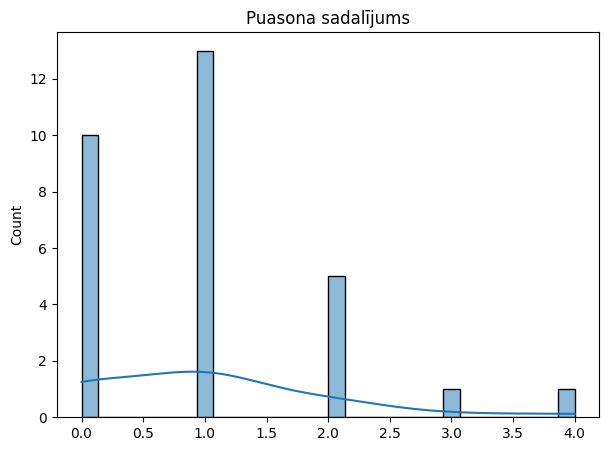

In [5]:
# Puasona sadalījums
plt.figure(figsize=(7, 5))
sns.histplot(poisson_data, bins=30, kde=True)
plt.title('Puasona sadalījums')
plt.show()

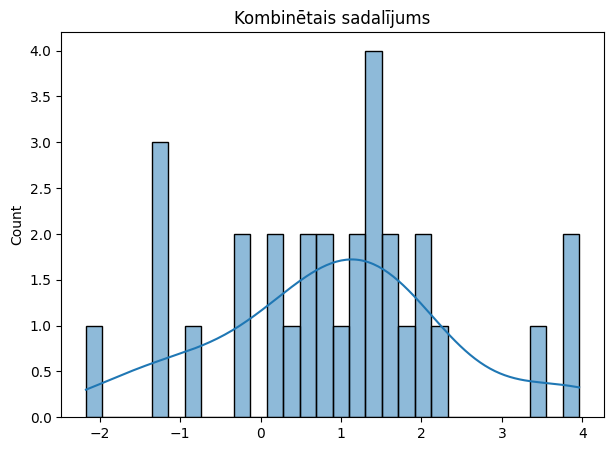

In [6]:
# Kombinētais sadalījums
plt.figure(figsize=(7, 5))
sns.histplot(combined_data, bins=30, kde=True)
plt.title('Kombinētais sadalījums')
plt.show()

Aprēķināt un izdrukāt visu četru mainīgo korelācijas koeficientu matricu.

In [7]:
# Apvienojam datus vienā 2D masīvā
distributions = np.vstack((norm_data, uniform_data, poisson_data, combined_data))

# Aprēķinām korelācijas koeficientu matricu
correlation_matrix = np.corrcoef(distributions)

print("Korelācijas koeficientu matrica:")
print(correlation_matrix)

Korelācijas koeficientu matrica:
[[ 1.          0.24800392  0.28469615  0.98346048]
 [ 0.24800392  1.         -0.11216206  0.27903534]
 [ 0.28469615 -0.11216206  1.          0.25001242]
 [ 0.98346048  0.27903534  0.25001242  1.        ]]


Veikt hipotēžu pārbaudes par to vai mainīgie ir normāli sadalīti, izdrukāt un aprakstīt testa statistiku un interpretēt rezultātus.

In [8]:
from scipy.stats import shapiro

names = ['Normālais', 'Vienmērīgais', 'Puasona', 'Kombinētais']

for distribution, name in zip(distributions, names):
    print(f"{name} sadalījums:")
    if shapiro(distribution).pvalue < 0.05:
        print(f"Tā kā p-value ir mazāka par 0.05, mēs nepieņemam nulles hipotēzi un secinām, ka dati nav normāli sadalīti.\n")
    else:
        print(f"Tā kā p-value ir lielāka par 0.05, mēs pieņemam nulles hipotēzi un secinām, ka dati izskatās normāli sadalīti.\n")


Normālais sadalījums:
Tā kā p-value ir lielāka par 0.05, mēs pieņemam nulles hipotēzi un secinām, ka dati izskatās normāli sadalīti.

Vienmērīgais sadalījums:
Tā kā p-value ir lielāka par 0.05, mēs pieņemam nulles hipotēzi un secinām, ka dati izskatās normāli sadalīti.

Puasona sadalījums:
Tā kā p-value ir mazāka par 0.05, mēs nepieņemam nulles hipotēzi un secinām, ka dati nav normāli sadalīti.

Kombinētais sadalījums:
Tā kā p-value ir lielāka par 0.05, mēs pieņemam nulles hipotēzi un secinām, ka dati izskatās normāli sadalīti.



**Remark:** Protams, kad datu ir tik maz, pat vienmērīgais sadalījums var izskatīties līdzīgs normālajam.

### 2. Montekarlo simulācija

Jums pieder mājaslapa, kurā ir reģistrēti 100 000 lietotāji, no kuriem 100 lietotāji ir no Latvijas. Katru dienu Jūsu mājaslapu apmeklē tieši 1000 reģistrētu lietotāju. Pieņemot, ka katrs mājaslapas apmeklējums ir neatkarīgs gadījuma lielums, izmantojot montekarlo simulāciju, aprēķināt kāds ir sagaidāmais dienu skaits konkrētā kalendāra gadā (365 dienas), kur mājaslapu apmeklēja vismaz divi apmeklētāji no Latvijas.

In [24]:
# Info
total_users = 100000
lv_users = 100
daily_visits = 1000
probability_lv = lv_users/total_users

In [25]:
# Parameters
simulations = 100
days_in_year = 365

In [22]:
days_with_2_lv_visitors = 0 

for _ in range(simulations):    
    for _ in range(days_in_year):
        # Simulating the daily visits for a single day (1 - lv, 0 - non-lv)
        daily_lv_visits = np.random.choice([1, 0], size=daily_visits, p=[probability_lv, 1-probability_lv])
        
        # Counting the Latvian visits for the day
        latvians_today = daily_lv_visits.sum()
        
        # Check if there are at least two Latvian visitors on that day
        if latvians_today >= 2:
            days_with_2_lv_visitors += 1

avg_days_with_2_lv_visitors = days_with_2_lv_visitors / simulations

print(f"Sagaidāmais dienu skaits gadā, kad mājaslapu apmeklē vismaz divi lietotāji no Latvijas: {avg_days_with_2_lv_visitors}.")

Sagaidāmais dienu skaits gadā, kad mājaslapu apmeklē vismaz divi lietotāji no Latvijas: 96.55.


### 3. Statistiskais tests sadalījumam

In [23]:
from scipy.stats import chisquare

